In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas as gpd


In [36]:
# map_df = gpd.read_file('data/geo-data/countries.shp')
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tracks_df = pd.read_csv('data/SpotifyFeatures.csv')

country_codes_df = pd.read_csv('data/geo-data/country_codes_a2_a3.csv')
country_codes_df.rename(index=str, columns={'Alpha-3 code': 'iso_a3', 'Alpha-2 code': 'iso_a2'}, inplace=True)


world_df = world_df.merge(country_codes_df)
world_df.info()
# world_df.head(5)
tracks_df.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pop_est              182 non-null    int64   
 1   continent            182 non-null    object  
 2   name                 182 non-null    object  
 3   iso_a3               182 non-null    object  
 4   gdp_md_est           182 non-null    float64 
 5   geometry             182 non-null    geometry
 6   Country              182 non-null    object  
 7   iso_a2               181 non-null    object  
 8   Numeric code         182 non-null    int64   
 9   Latitude (average)   182 non-null    float64 
 10  Longitude (average)  182 non-null    float64 
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 17.1+ KB


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [38]:
birthplace_df = pd.read_csv('data/artist_birthplace.csv')
birthplace_df = birthplace_df.rename(columns={'name':'artist_name'})
# birthplace_df.info()
birthplace_df.head(5)

,Unnamed: 0,artist_name,birth_country
0,0,Henri Salvador,FR
1,1,Joseph Williams,US
2,2,Fabien Nataf,FR
3,3,Laura Mayne,FR
4,4,Chorus,PL


In [45]:
tracks_df = tracks_df.merge(birthplace_df)


In [39]:
birthplace_counts_df = birthplace_df.groupby('birth_country').count().drop(columns='Unnamed: 0').reset_index().rename(columns={'artist_name':'artist_count', 'birth_country': 'iso_a2'})
# birthplace_counts_df.rename({'Unnamed':'artist_count'})
birthplace_counts_df.head(5)

,iso_a2,artist_count
0,AG,1
1,AM,3
2,AO,1
3,AR,55
4,AS,1


In [50]:
metrics_df = tracks_df[['birth_country', 'tempo', 'danceability', 'energy', 'valence']]
metrics_df.head(5)

,birth_country,tempo,danceability,energy,valence
0,FR,166.969,0.389,0.9100,0.814
1,FR,171.758,0.240,0.3260,0.227
2,FR,87.479,0.578,0.0948,0.358
3,FR,71.633,0.451,0.4910,0.516
4,FR,127.999,0.704,0.8040,0.836


In [58]:
metric_means_df = metrics_df.groupby('birth_country').mean().reset_index()
metric_means_df.head(10)
metric_means_df = metric_means_df.rename(columns={'birth_country':'iso_a2'})
# metric_means_df.info()

In [59]:
world_df = world_df.merge(metric_means_df)


In [65]:
world_df = world_df.merge(birthplace_counts_df)
world_df['artist_count'] = np.log10(world_df['artist_count'])


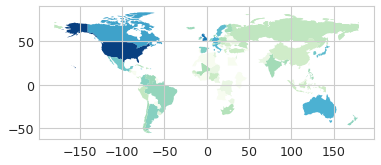

In [66]:
world_df.plot(column='artist_count', cmap='GnBu')

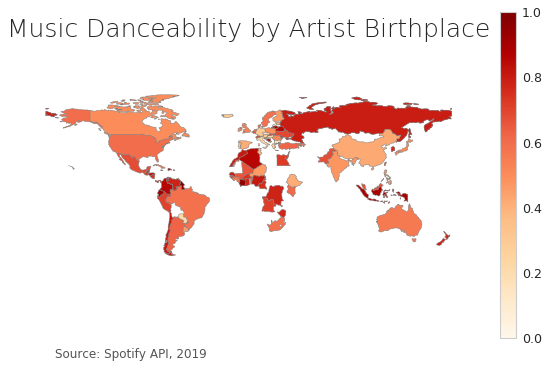

In [102]:
vmin, vmax = 0, 1

fig, ax = plt.subplots(1, figsize=(10, 6))

world_df.plot(column='danceability', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.5')

ax.axis('off')

ax.set_title('Music Danceability by Artist Birthplace', fontdict={'fontsize': '25', 'fontweight' : '3'}, pad=50)

ax.annotate('Source: Spotify API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

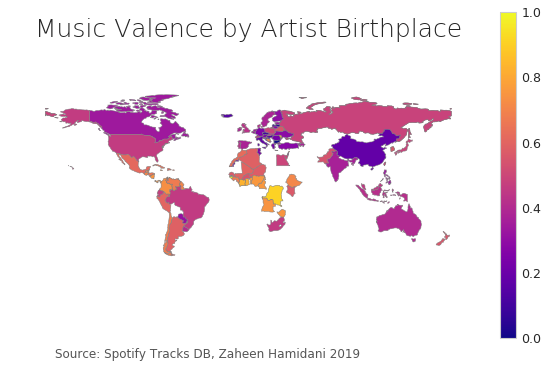

In [99]:
vmin, vmax = 0, 1

fig, ax = plt.subplots(1, figsize=(10, 6))

world_df.plot(column='valence', cmap='plasma', linewidth=0.5, ax=ax, edgecolor='0.5')

ax.axis('off')

ax.set_title('Music Valence by Artist Birthplace', fontdict={'fontsize': '25', 'fontweight' : '3'}, pad=50)

ax.annotate('Source: Spotify API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

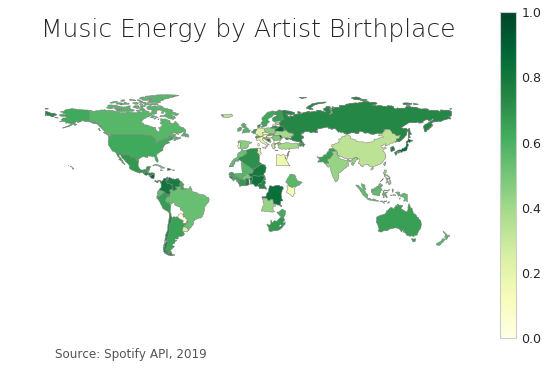

In [100]:
vmin, vmax = 0, 1

fig, ax = plt.subplots(1, figsize=(10, 6))

world_df.plot(column='energy', cmap='YlGn', linewidth=0.5, ax=ax, edgecolor='0.5')

ax.axis('off')

ax.set_title('Music Energy by Artist Birthplace', fontdict={'fontsize': '25', 'fontweight' : '3'}, pad=50)

ax.annotate('Source: Spotify API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)